In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
%matplotlib inline

In [71]:
all_customers = pd.read_csv("Telco_Customer_Churn.csv")
all_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Splitting based on Churn

In [72]:
filter = (all_customers["Churn"] == 'No')
customer_stayed = all_customers[filter]

#Customers who left
filter = (all_customers["Churn"] == 'Yes')
customer_left = all_customers[filter]


## Helper Functions

In [73]:
def bar_plot(df,column, title):    
    ax = sns.countplot(y=column, data=df)
    plt.title(title)
    plt.xlabel('Count')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
def countplot(df, col_name):
    plot = sns.countplot(data = df, x = col_name, hue="Churn", saturation=0.65)
    plt.title(f"{col_name} Count")
    plt.show()

## Tenure disturbution for all customers

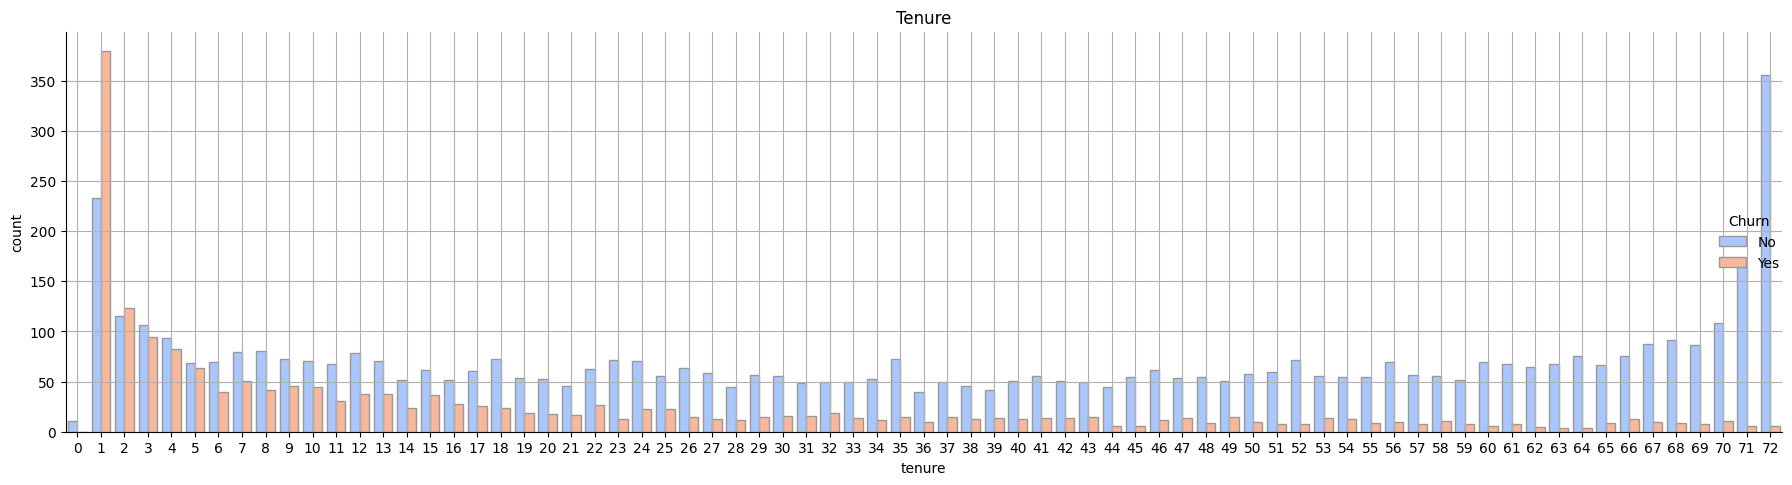

In [74]:
sns.catplot(x='tenure', hue='Churn', data=all_customers, kind='count', palette='coolwarm', edgecolor='0.6', saturation=4)
plt.title("Tenure"); plt.grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=0.8, wspace=0.10, hspace=0.2)

# The graph above concludes
1. Majority of people who leave, leave in first 6 months, and this number fades away as tenure increases
2. Number of people who stay is constant between 6 - 72 months. with a good amount of people who we consider loyal(stayed for a long time)

# Analysis of people who left in first 6 months

In [75]:
less_than_6 = customer_left[(customer_left["tenure"] >= 1) & (customer_left["tenure"] < 6)]

In [76]:
##PEOPLE who left early(1 - 6 months)
print (f"people who left between (1 - 6) months = {len(less_than_6)}")
percent = (len(less_than_6)/len(customer_left))*100
percent = round(percent,2)
print (f"Around {percent}%")

people who left between (1 - 6) months = 744
Around 39.81%


## Internet Service 

([<matplotlib.patches.Wedge at 0x7f662a6ebf70>,
 [Text(-0.2712187355902124, 1.0660395853179405, 'Fiber'),
  Text(-0.0835265515284008, -1.0968241952062208, 'DSL'),
  Text(1.04236728853544, -0.3513836020523367, 'No')],
 [Text(-0.14793749214011587, 0.5814761374461493, '57.9%'),
  Text(-0.04555993719730952, -0.5982677428397567, '31.7%'),
  Text(0.5685639755647854, -0.19166378293763817, '10.3%')])

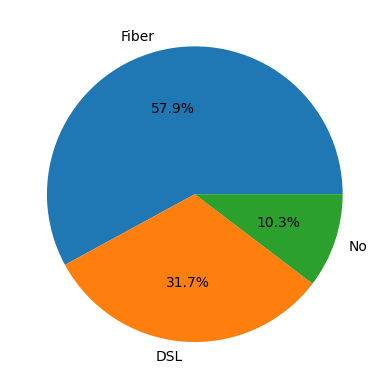

In [77]:
data = less_than_6["InternetService"].value_counts().tolist()
percent = (data[0] / len(less_than_6)) * 100
percent2 = (data[1] / len(less_than_6)) * 100
percent3 = (data[2] / len(less_than_6)) * 100

labels = ["Fiber", "DSL", "No"]
plt.pie(data, labels=labels, autopct="%1.1f%%")

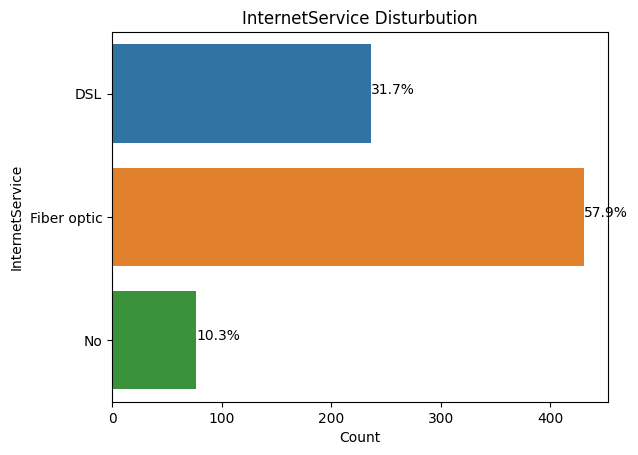

In [78]:
bar_plot(less_than_6, "InternetService", "InternetService Disturbution")

## Contract Count
### Almost all month-to-month

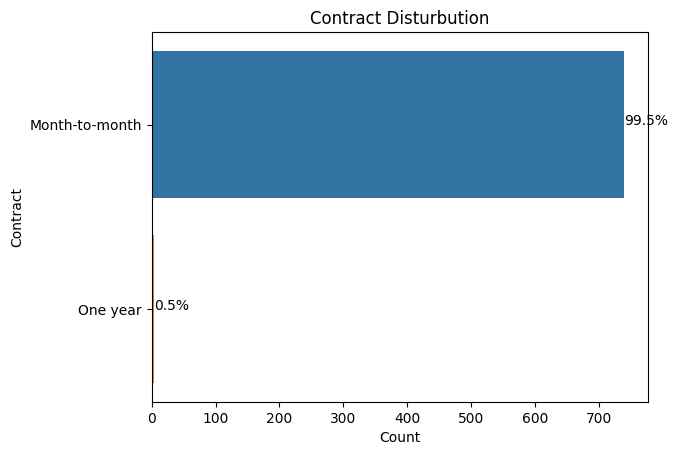

In [79]:
bar_plot(less_than_6, "Contract", "Contract Disturbution")

## Payment Method


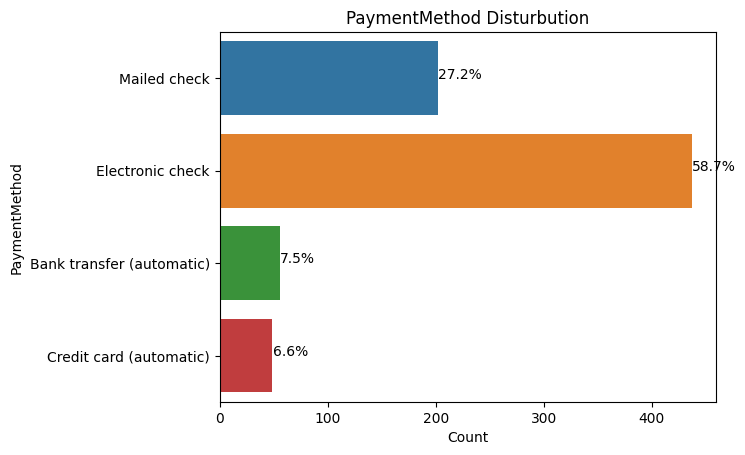

In [80]:
bar_plot(less_than_6, "PaymentMethod", "PaymentMethod Disturbution")

## Services Statistics

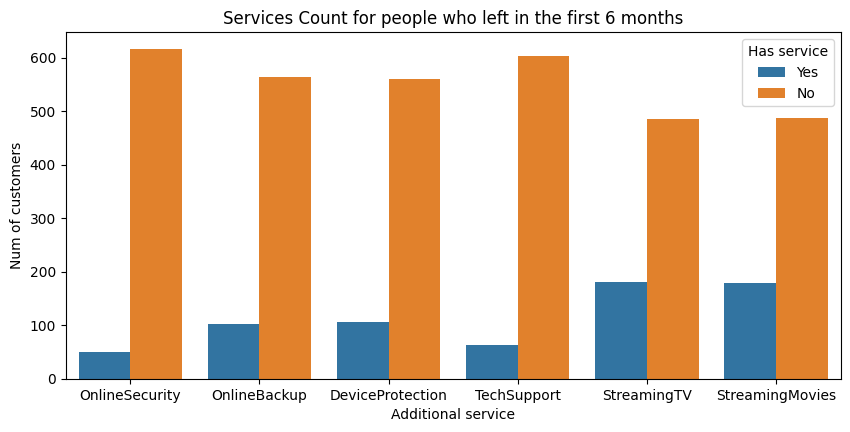

In [81]:
services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(less_than_6[less_than_6["InternetService"] != "No"][services]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.title("Services Count for people who left in the first 6 months")
plt.show()

## Average Monthly Charge

In [82]:
charges = less_than_6.MonthlyCharges
print (f"Average monthly Charge {round(charges.mean(), 2)}")

Average monthly Charge 62.97


# Conclusion | Insight
[99%] had month-to-month contracts

[58%] used electronic payment 
Most Services used:
1. StreamingTV 
2. StreamingMovies

[57%] had fiber

AverageMonthlyCharge = 63 USD


## Lets do the same analysis , but for people who did not leave in first 6 months

In [83]:
less_than_6_stayed = customer_stayed[(customer_stayed["tenure"] >= 1) & (customer_stayed["tenure"] < 6)]

In [84]:
print (f"People who still did not leave in between (1 - 6) months = {len(less_than_6_stayed)}")
percent = (len(less_than_6_stayed)/len(customer_stayed))*100
percent = round(percent,2)
print (f"Around {percent}%")

People who still did not leave in between (1 - 6) months = 616
Around 11.91%


([<matplotlib.patches.Wedge at 0x7f662b422a40>,
 [Text(0.3844106326484338, 1.0306446844120583, 'No'),
  Text(-0.978574494278536, -0.5023862648873948, 'DSL'),
  Text(0.8126873960850484, -0.7413091097811385, 'Fiber Optic')],
 [Text(0.20967852689914568, 0.5621698278611226, '38.6%'),
  Text(-0.5337679059701105, -0.2740288717567608, '37.8%'),
  Text(0.44328403422820817, -0.4043504235169846, '23.5%')])

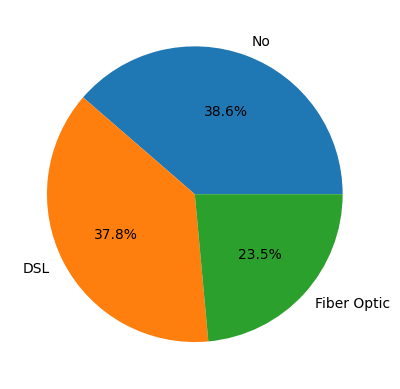

In [86]:
data = less_than_6_stayed["InternetService"].value_counts().tolist()
percent = (data[0] / len(less_than_6_stayed)) * 100
percent2 = (data[1] / len(less_than_6_stayed)) * 100
percent3 = (data[2] / len(less_than_6_stayed)) * 100

labels = ["No", "DSL", "Fiber Optic"]
plt.pie(data, labels=labels, autopct="%1.1f%%")

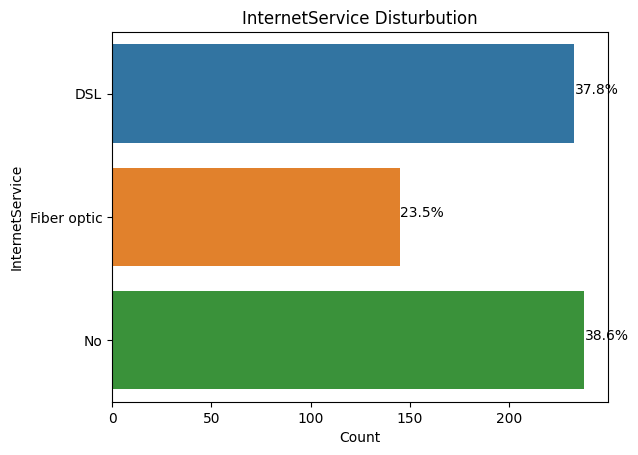

In [87]:
bar_plot(less_than_6_stayed, "InternetService", "InternetService Disturbution")

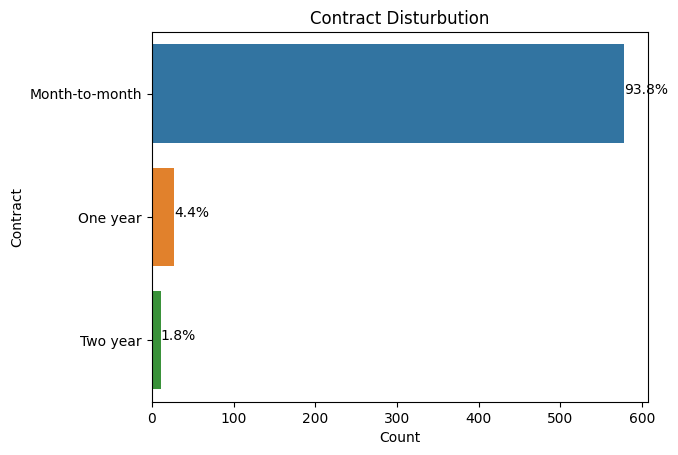

In [88]:
bar_plot(less_than_6_stayed, "Contract", "Contract Disturbution")

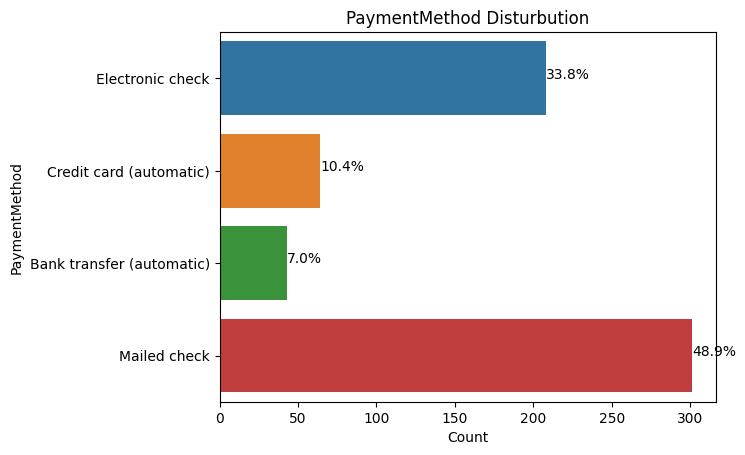

In [89]:
bar_plot(less_than_6_stayed, "PaymentMethod", "PaymentMethod Disturbution")

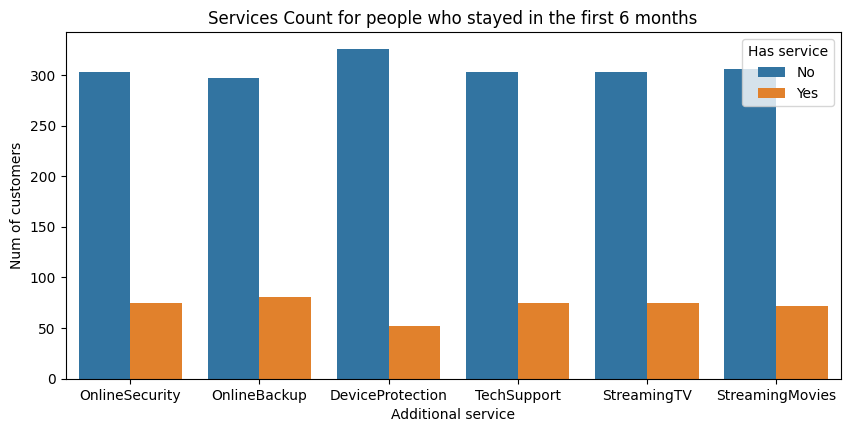

In [90]:
services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(less_than_6_stayed[less_than_6_stayed["InternetService"] != "No"][services]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.title("Services Count for people who stayed in the first 6 months")
plt.show()

In [91]:
charges = less_than_6_stayed.MonthlyCharges
print (f"Average monthly Charge {round(charges.mean(), 2)}")

Average monthly Charge 44.7


# Conclusion | Insight
1. Equal disturbution of internet service usage , with around 38% that dont even have internet and 37% use DSL
2. 49% use mailed check , while 38% use Electronic Check
3. 93% have month-to-month contracts
4. Most services used are: OnlineBackup and OnlineSecurity

# Analysis of loyal customers(tenure > 65)

In [92]:
loyal = customer_stayed[(customer_stayed["tenure"] > 65)]


In [93]:
print (f"People stayed for a long time = {len(loyal)}")
percent = (len(loyal)/len(customer_stayed))*100
percent = round(percent,2)
print (f"Around {percent}%")

People stayed for a long time = 970
Around 18.75%


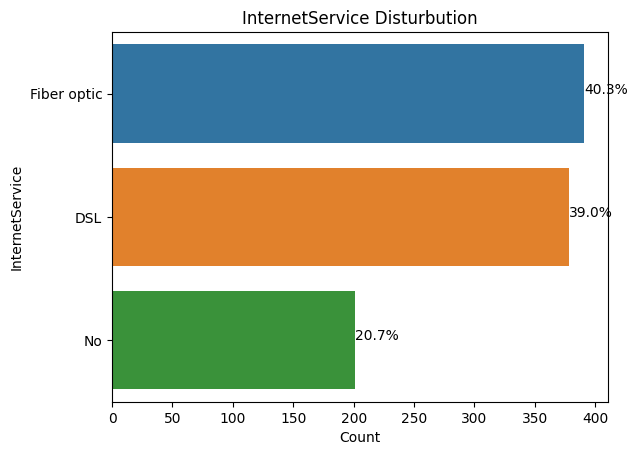

In [94]:
bar_plot(loyal, "InternetService", "InternetService Disturbution")

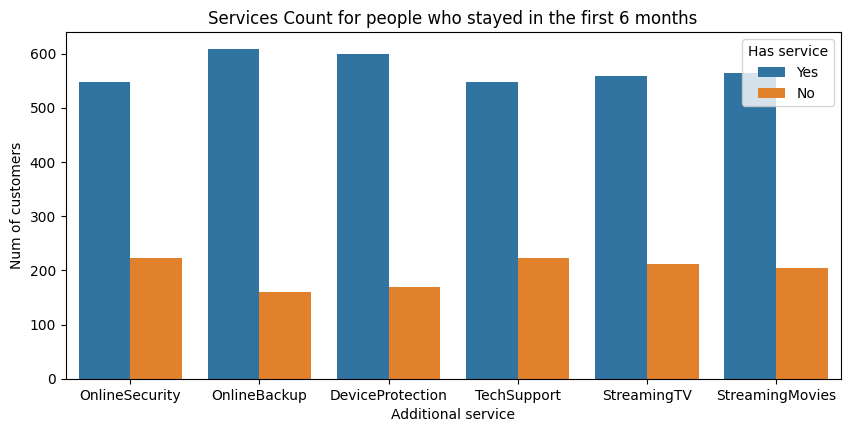

In [95]:
services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(loyal[loyal["InternetService"] != "No"][services]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.title("Services Count for people who stayed in the first 6 months")
plt.show()

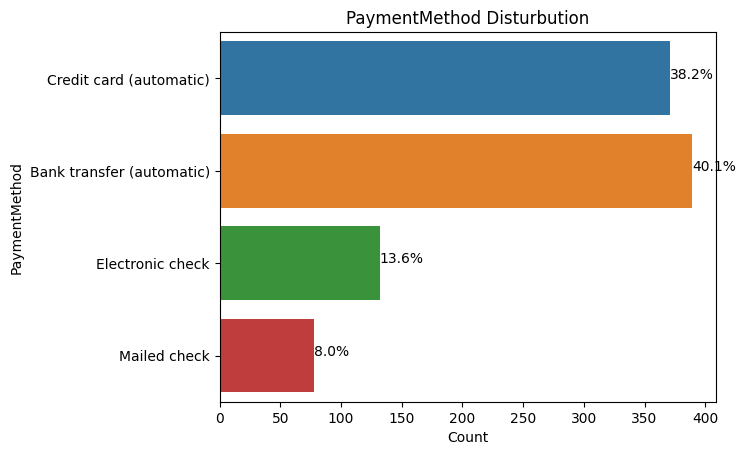

In [96]:
bar_plot(loyal, "PaymentMethod", "PaymentMethod Disturbution")

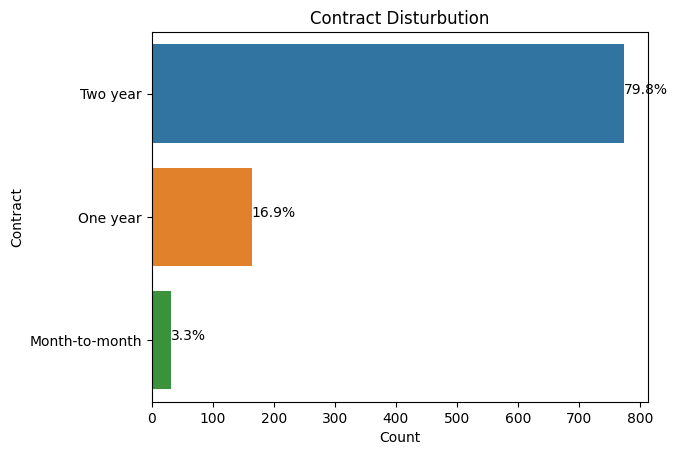

In [97]:
bar_plot(loyal, "Contract", "Contract Disturbution")

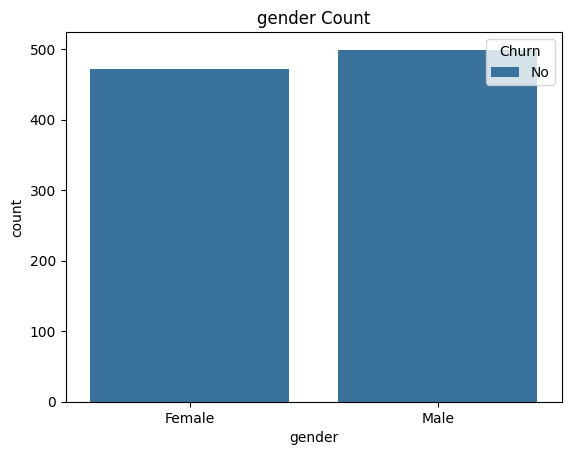

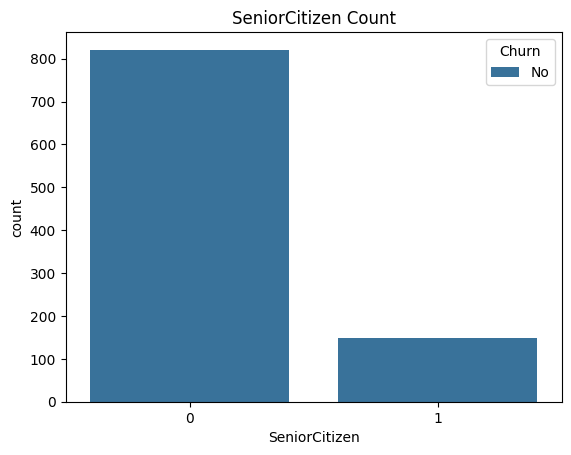

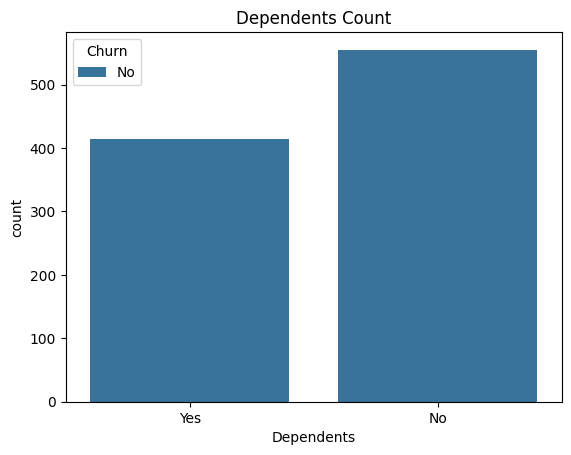

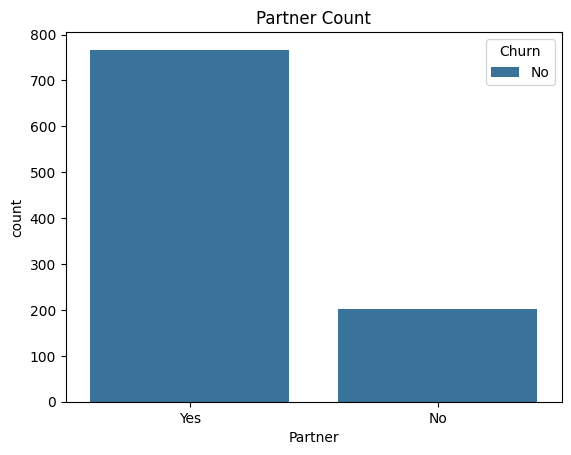

In [98]:
countplot(loyal, "gender")
countplot(loyal, 'SeniorCitizen')
countplot(loyal, "Dependents")
countplot(loyal, "Partner")

In [ ]:
charges = loyal.MonthlyCharges
print (f"Average monthly Charge {round(charges.mean(), 2)}")